# Order of the average means 
**of the length distributions for the different genomes/proteomes**

## Import python modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../../gl_lib/')
import gl_constants as c

## Retrieving the data for the different groups of organisms

In [2]:
# data @
g_stat_file = c.SUPPL_TABLES_PATH + "protCodGenes_averageLg_perGoOrg.txt"
p_stat_file = c.SUPPL_TABLES_PATH + "proteins_averageLp_perGoOrg.txt"
if 0:
    print("The protein Coding gene data is in:\n", g_stat_file, "\n")
    print("The protein data is in:\n", p_stat_file, "\n")

g_stat_df = pd.read_csv(g_stat_file, sep="\t", comment="#") # columns separated by irregular spaces
g_stat_df = g_stat_df[["g_orgs", "mean"]]
g_stat_df = g_stat_df.rename(columns={"mean": "g_mean"})
p_stat_df = pd.read_csv(p_stat_file, sep="\t", comment="#")
p_stat_df = p_stat_df[["g_orgs", "mean"]]
p_stat_df = p_stat_df.rename(columns={"mean": "p_mean"})
g_stat_df['g_orgs'] = g_stat_df['g_orgs'].replace(['Ascomycota except Saccharomycotina', 'Saccharomycotina', 'Mammalia'],\
     ['Ascomycota but Sacch.', 'Saccharomycotina (yeast)', 'Mammalia but Primates'])
p_stat_df['g_orgs'] = p_stat_df['g_orgs'].replace(['Ascomycota except Saccharomycotina', 'Saccharomycotina', 'Mammalia'], \
    ['Ascomycota but Sacch.', 'Saccharomycotina (yeast)', 'Mammalia but Primates'])
#
# The very same groups to compare both sets
g_orgs = set(g_stat_df["g_orgs"].to_list()).intersection( set(p_stat_df["g_orgs"].to_list()))
g_stat_df = g_stat_df.loc[g_stat_df["g_orgs"].isin(g_orgs)]
p_stat_df = p_stat_df.loc[p_stat_df["g_orgs"].isin(g_orgs)]
if 0:
    print(g_stat_df)
    print(p_stat_df)
stat_df = pd.merge(g_stat_df, p_stat_df, how='left', left_on='g_orgs', right_on='g_orgs')
# display for tracing
if 0:
    print(stat_df.shape)
    display(stat_df.info())

---
## Functions

In [3]:
def plot_average_of_means(df, col_y, y_lab, l_hue, title): 
    sns.set_theme()
    fig, axs = plt.subplots(1, 1, figsize=(6, 12))
    fig.suptitle(title)
    axs.set(xlabel=None, ylabel=y_lab) 
    axs.set(xticklabels=[]) 
    g = sns.scatterplot(data=df, x=1, y=col_y, s=20, hue=l_hue, palette=c.COLOR_ORG_MEAN_GROUPS, legend=True)
    if col_y == "g_mean":   
        plt.yscale('log')
        axs.axhline(1500, ls='dotted', alpha=0.25, color="gray")
    plt.grid(True)      
    plt.legend(title="Group of organisms", reverse=True, fontsize='9', title_fontsize='9', loc='upper right', borderaxespad=0)
    plt.show(True)

---

## Prepare the plot

In [4]:
df2plot = stat_df
legends_by = "g_orgs"

### Protein coding genes

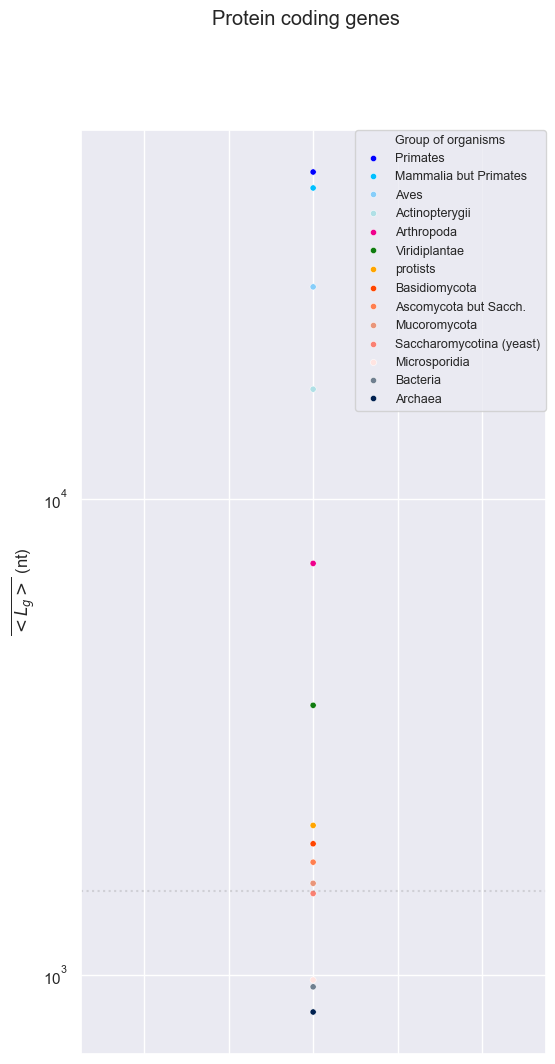

In [5]:
title = "Protein coding genes"
col_y = "g_mean"  
y_lab = "$\overline{<L_{g}>}$ (nt)"
plot_average_of_means(df2plot, col_y, y_lab, legends_by, title)

### Proteins

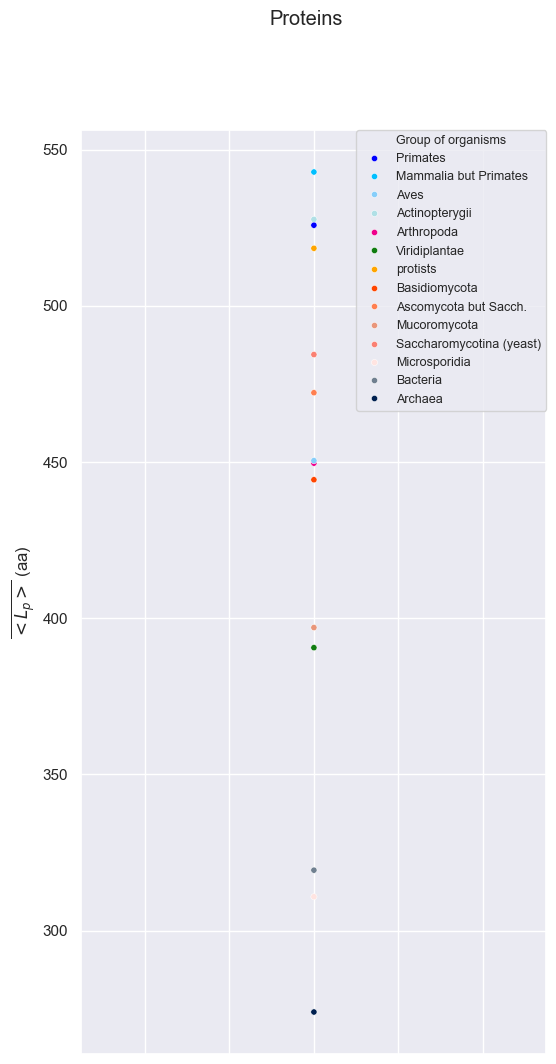

In [6]:
title = "Proteins"
col_y = "p_mean"  
y_lab = "$\overline{<L_{p}>}$ (aa)"
plot_average_of_means(df2plot, col_y, y_lab, legends_by, title)